In [62]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [63]:
data = pd.read_csv("customer_churn.csv")
display(data.shape)
data.head().T

(7043, 21)

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Exploring the data and checking its datatypes

In [64]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [66]:
data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [67]:
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [68]:
data.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [69]:
# Converting Churn's boolean values into 0 and 1.

data["Churn_1"] = np.where((data["Churn"] == "Yes"), 1, 0)

In [70]:
display(data.Churn.value_counts())

data.head()

No     5174
Yes    1869
Name: Churn, dtype: int64

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_1
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


# Splitting the data into target and features

In [71]:
y = data.Churn_1
X = data[["tenure", "SeniorCitizen", "MonthlyCharges"]]

In [72]:
display(y.head())
display(X.head())

0    0
1    0
2    1
3    0
4    1
Name: Churn_1, dtype: int64

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


# Correlation and EDA

<Axes: >

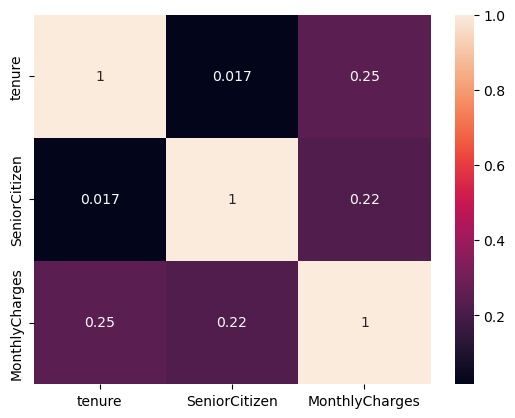

In [73]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot = True)

In [74]:
# Features have low correlation among themselves.

<Axes: xlabel='Churn_1', ylabel='count'>

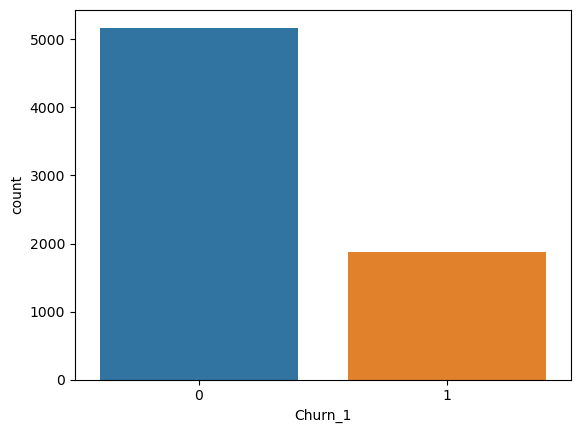

In [75]:
sns.countplot(x = data.Churn_1)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

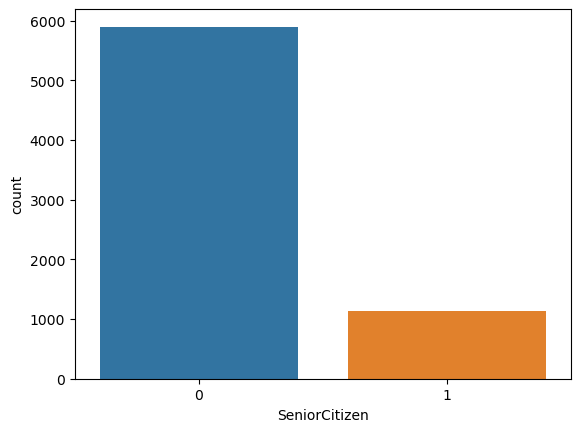

In [76]:
sns.countplot(x = data.SeniorCitizen)

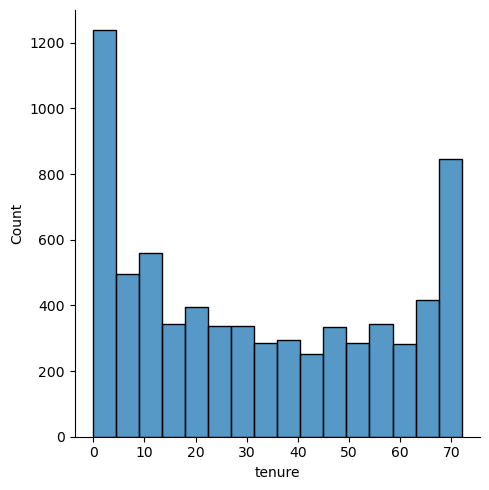

In [77]:
sns.displot(data.tenure)

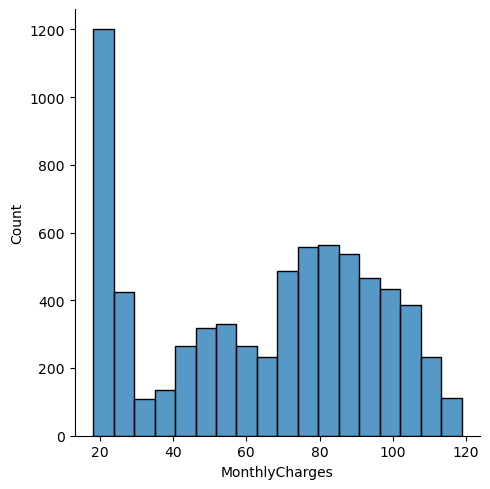

In [78]:
sns.displot(data.MonthlyCharges)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [80]:
# There are only numeric features and not catgeorical. So only scaling would be required.
# Scaling train and test set together.

transformer = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,0.333333,0.0,0.309263
1,0.750000,1.0,0.468127
2,0.041667,0.0,0.218127
3,0.847222,0.0,0.019920
4,0.166667,0.0,0.659363


In [81]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn_1, dtype: int64

In [82]:
y_test.head()

2200    0
4627    0
3225    0
2828    0
3768    0
Name: Churn_1, dtype: int64

In [83]:
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [84]:
display(y_train.head())
y_test.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_1, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: Churn_1, dtype: int64

In [85]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

# Predictions score
LR.score(X_test_scaled, y_test)

0.7825099375354913

In [86]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

reg_precision = precision_score(y_test,pred)
reg_recall_score = recall_score(y_test,pred)
reg_f1_score = f1_score(y_test,pred)

print("Regression precision: ", reg_precision)
print("Regression recall: ", reg_recall_score)
print("Regression f1: ", reg_f1_score)

Regression precision:  0.6176470588235294
Regression recall:  0.4535637149028078
Regression f1:  0.5230386052303861


In [87]:
from sklearn.metrics import confusion_matrix
after_regression_cm = confusion_matrix(y_test,pred)
after_regression_cm

array([[1168,  130],
       [ 253,  210]])

In [88]:
# Even though we have 0.78 LR score, the precision score, recall and f1 score are relatively low.

# SMOTE

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [91]:
display(X_train_SMOTE.shape)
display(X_train_SMOTE.head())

(7752, 3)

,tenure,SeniorCitizen,MonthlyCharges
0,0.333333,0.0,0.309263
1,0.750000,1.0,0.468127
2,0.041667,0.0,0.218127
3,0.847222,0.0,0.019920
4,0.166667,0.0,0.659363


In [92]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred_smote = LR.predict(X_test_scaled)

smote_precision = precision_score(y_test,pred_smote)
smote_recall_score = recall_score(y_test,pred_smote)
smote_f1_score = f1_score(y_test,pred_smote)

print("SMOTE precision: ", smote_precision)
print("SMOTE recall: ", smote_recall_score)
print("SMOTE f1: ", smote_f1_score)

SMOTE precision:  0.47982708933717577
SMOTE recall:  0.7192224622030238
SMOTE f1:  0.5756266205704408


In [93]:
smote_cm = confusion_matrix(y_test, pred_smote)
smote_cm

array([[937, 361],
       [130, 333]])

# Oversampling/ Undersampling

In [94]:
from sklearn.utils import resample


# Oversampling/ Undersampling has to be done on train set.

train = pd.concat([X_train_scaled,y_train], axis = 1)
print(train.shape)
train.head()

(5282, 4)


,tenure,SeniorCitizen,MonthlyCharges,Churn_1
0,0.333333,0.0,0.309263,0
1,0.750000,1.0,0.468127,0
2,0.041667,0.0,0.218127,1
3,0.847222,0.0,0.019920,0
4,0.166667,0.0,0.659363,1


In [95]:
#Separating by churn types.

no_churn = train[train["Churn_1"] == 0]
yes_churn = train[train["Churn_1"] == 1]

In [96]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

# Oversampling

In [97]:
# We oversample yes churn data since they are low in numbers.

yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                 replace=True, #<- we need replacement, since we don't have enough data otherwise
                                 n_samples = len(no_churn),#<- make both sets the same size
                                 random_state=0)

In [98]:
# After oversampling now the no and yes churn dataset are of same size.
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(30)

(3876, 4)

(3876, 4)

,tenure,SeniorCitizen,MonthlyCharges,Churn_1
2453,0.013889,0.0,0.509462,1
1976,0.013889,0.0,0.811753,1
4528,0.041667,0.0,0.367530,1
3011,0.013889,0.0,0.608566,1
2758,0.055556,0.0,0.026892,1
5202,0.847222,0.0,0.011454,1
3763,0.222222,1.0,0.206673,1
1033,0.083333,0.0,0.375000,1
2135,0.333333,0.0,0.774402,1
4006,0.055556,0.0,0.552789,1


In [99]:
# Now we concat no churn and yes oversampled churn dataset

train_oversampled = pd.concat([no_churn, yes_churn_oversampled], axis = 0)

display(train_oversampled.shape)
train_oversampled.head()

(7752, 4)

,tenure,SeniorCitizen,MonthlyCharges,Churn_1
0,0.333333,0.0,0.309263,0
1,0.750000,1.0,0.468127,0
3,0.847222,0.0,0.019920,0
5,0.805556,0.0,0.613048,0
6,0.361111,0.0,0.672311,0


In [100]:
# Now creating target and feature columns for regression

y_train_over = train_oversampled["Churn_1"].copy()
X_train_over = train_oversampled.drop('Churn_1',axis = 1).copy()

In [104]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred_oversampled = LR_over.predict(X_test_scaled)

oversample_precision = precision_score(y_test,pred_oversampled)
oversample_recall = recall_score(y_test,pred_oversampled)
oversample_f1score = f1_score(y_test,pred_oversampled)

print("Oversampling precision: ", oversample_precision)
print("Oversampling recall: ",oversample_recall)
print("Oversampling f1: ",oversample_f1score)

Oversampling precision:  0.4790764790764791
Oversampling recall:  0.7170626349892009
Oversampling f1:  0.57439446366782


In [105]:
oversampled_cm = confusion_matrix(y_test, pred_oversampled)
oversampled_cm

array([[937, 361],
       [131, 332]])

# Undersampling

In [106]:
# Now we undersample no data.

no_churn_oversampled = resample(no_churn, #<- sample from here
                                 replace=False, #<- we need replacement, since we don't have enough data otherwise
                                 n_samples = len(yes_churn),#<- make both sets the same size
                                 random_state=0)

In [107]:
display(yes_churn.shape)
display(no_churn_oversampled.shape)

(1406, 4)

(1406, 4)

In [108]:
train_undersampled = pd.concat([no_churn_oversampled, yes_churn], axis = 0)
train_undersampled.shape

(2812, 4)

In [109]:
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn_1
4391,0.166667,0.0,0.603586,0
3527,0.083333,0.0,0.071215,0
768,0.097222,0.0,0.600598,0
5022,0.444444,0.0,0.440239,0
4567,0.972222,1.0,0.715139,0


In [110]:
y_train_under = train_undersampled["Churn_1"].copy()
X_train_under = train_undersampled.drop('Churn_1',axis = 1).copy()

In [111]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred_undersample = LR.predict(X_test_scaled)

undersample_precision = precision_score(y_test,pred_undersample)
recall_score = recall_score(y_test,pred_undersample)
f1score_score = f1_score(y_test,pred_undersample)

print("After undersample precision: ", undersample_precision)
print("After undersample recall: ", recall_score)
print("After undersample f1: ", f1score_score)

After undersample precision:  0.47701149425287354
After undersample recall:  0.7170626349892009
After undersample f1:  0.5729076790336497


In [112]:
after_undersample_cm = confusion_matrix(y_test, pred_undersample)
after_undersample_cm

array([[934, 364],
       [131, 332]])

# Results

Regression Results

In [113]:
print("Regression precision: ", reg_precision)
print("Regression recall: ", reg_recall_score)
print("Regression f1: ", reg_f1_score)
after_regression_cm

Regression precision:  0.6176470588235294
Regression recall:  0.4535637149028078
Regression f1:  0.5230386052303861


array([[1168,  130],
       [ 253,  210]])

SMOTE Results

In [114]:
print("SMOTE precision: ", smote_precision)
print("SMOTE recall: ", smote_recall_score)
print("SMOTE f1: ", smote_f1_score)
smote_cm

SMOTE precision:  0.47982708933717577
SMOTE recall:  0.7192224622030238
SMOTE f1:  0.5756266205704408


array([[937, 361],
       [130, 333]])

Oversampling Results

In [116]:
print("Oversampling precision: ", oversample_precision)
print("Oversampling recall: ",oversample_recall)
print("Oversampling f1: ",oversample_f1score)
oversampled_cm

Oversampling precision:  0.4790764790764791
Oversampling recall:  0.7170626349892009
Oversampling f1:  0.57439446366782


array([[937, 361],
       [131, 332]])

Undersampling Results

In [117]:
print("After undersample precision: ", undersample_precision)
print("After undersample recall: ", recall_score)
print("After undersample f1: ", f1score_score)
after_undersample_cm

After undersample precision:  0.47701149425287354
After undersample recall:  0.7170626349892009
After undersample f1:  0.5729076790336497


array([[934, 364],
       [131, 332]])

After analyzing above results, looks like the sampling method have similar results. Although there recall and f1 score is higher than the logistic regresion's recall and f1 score. I will select undersampling as their results seems to be slightly better.